In [838]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging
from sklearn.model_selection import train_test_split

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.10.0


In [839]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [840]:
x_train = np.load('../training_dataset_homework2/x_train.npy')
y_train = np.load('../training_dataset_homework2/y_train.npy')

In [841]:
x_train.shape, y_train.shape

((2429, 36, 6), (2429,))

In [842]:
y_train[1801]

9

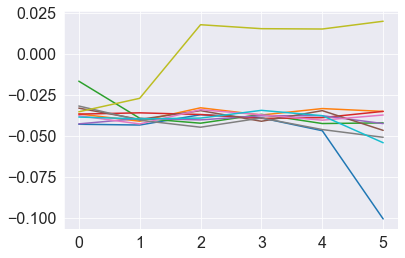

In [843]:
test = x_train.copy()
test = (test - test.mean()) / (test.std())

index = 1800
feature = 2

for i in range(0, 10):
    plt.plot(test[index + i][feature])

In [844]:
x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train, random_state=seed, test_size=.35
)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1578, 36, 6), (1578,), (851, 36, 6), (851,))

In [845]:
y_train_argsort = y_train.argsort()
y_train = y_train[y_train_argsort]
x_train = x_train[y_train_argsort]

In [846]:
test = pd.DataFrame(y_train)
test.columns = ['type']
class_size = test.groupby("type").size().reset_index()
class_size = class_size.drop('type', axis=1)
class_size['split'] = [5, 5, 18, 18, 6, 12, 12, 5, 6, 22, 6, 5]
class_size.columns = ['size', 'split']
class_size

,size,split
0,25,5
1,85,5
2,158,18
3,241,18
4,38,6
5,104,12
6,201,12
7,45,5
8,76,6
9,517,22


In [847]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5
0,-71.200,-387.80,-883.45,-1070.80,-1495.8,-1645.0
1,-94.396,-442.38,-1016.80,-1371.00,-1638.7,-1819.2
2,-102.280,-451.26,-892.09,-1405.70,-1667.2,-1860.0
3,-98.070,-431.14,-907.08,-1371.30,-1822.3,-1950.5
4,-90.912,-405.83,-966.89,-1396.00,-1752.3,-2190.5
5,-87.422,-393.52,-931.27,-1437.00,-1850.7,-2175.5
6,-85.618,-399.17,-917.44,-1433.00,-1868.3,-2219.0
7,-79.155,-415.26,-952.00,-1407.00,-1925.3,-2207.9
8,-66.831,-429.11,-952.14,-1403.90,-1940.9,-2197.8
9,-56.836,-431.66,-935.32,-1418.60,-1928.2,-2275.1


In [848]:
def build_sequences(df, window=200, stride=200):
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    for id in df['class_key'].unique():
        # Take only meaningful features
        temp = df[df['class_key'] == id][[0, 1, 2, 3, 4, 5]].values
        # Save the label
        label = id
        # Compute padding length
        padding_len = window - len(temp)%window
        # Create padding and concatenate it
        padding = np.zeros((padding_len,6), dtype='float64')
        temp = np.concatenate((temp,padding))
        # Build features windows with their corresponging labels
        idx = 0
        while idx+window <= len(temp):
            dataset.append(temp[idx:idx+window])
            labels.append(label)
            idx += stride
    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels

test = x_train.copy()
shape = test.shape
new_size = shape[0] * shape[1]
test = pd.DataFrame(test.reshape((new_size, 6)))
test_classes = np.repeat(y_train, 36)
test['class_key'] = test_classes

test_x_train, test_y_train = build_sequences(test, window=36, stride=36)

test_x_train.shape

# result = []
#
# for i in range(0, 12):
#     datapoints = test.loc[test.class_key == i].copy()
#     datapoints = datapoints.drop('class_key', axis=1)
#     batches = np.split(datapoints, class_size.loc[i].split)
#     result.append(batches)
#
# test_train = result
# test_classes = np.repeat([0,1,2,3,4,5,6,7,8,9,10,11], list(class_size['split']))

(1590, 36, 6)

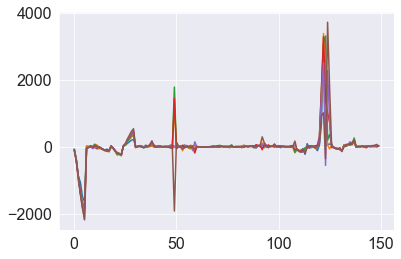

In [849]:
index = 0
feature = 0
use = test_x_train

for f in range(0, 6):
    test = use.copy()[index, feature + f]
    for i in range(1, 25):
        test = np.concatenate((test, use[index + i, feature + f].T))
    plt.plot(test)

In [850]:
label_mapping = {
    "Wish": 0,
    "Another": 1,
    "Comfortably": 2,
    "Money": 3,
    "Breathe":4,
    "Time":5,
    "Brain":6,
    "Echoes":7,
    "Wearing":8,
    "Sorrow":9,
    "Hey":10,
    "Shine":11
}

In [851]:
# Convert the sparse labels to categorical values
y_train_categorical = tfk.utils.to_categorical(test_y_train)
y_test_categorical = tfk.utils.to_categorical(y_test)
test_x_train.shape, y_train_categorical.shape, x_test.shape, y_test_categorical.shape

((1590, 36, 6), (1590, 12), (851, 36, 6), (851, 12))

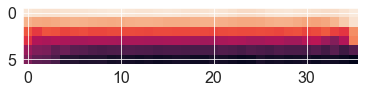

In [852]:
index = 0
image = test_x_train[index]

plt.figure(figsize=(6, 6))
plt.imshow(image.T)
plt.show()

In [853]:
y_dataframe = pd.DataFrame(y_train)

y_dataframe.columns = ['class']

y_dataframe = y_dataframe.groupby('class').size().to_frame().reset_index().set_index("class")
y_dataframe

,0
class,
0,25
1,85
2,158
3,241
4,38
5,104
6,201
7,45
8,76


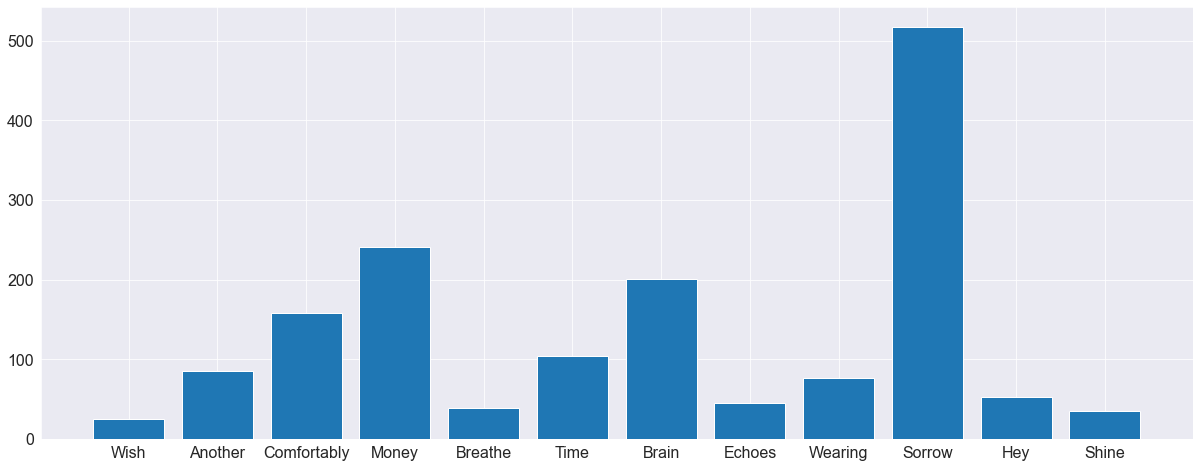

In [854]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1])
classnames = label_mapping.keys()
values = y_dataframe[0].values
ax.bar(classnames, values)

plt.show()

In [855]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    None,
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights, 0))

class_weights

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0}

In [856]:
input_shape = test_x_train.shape[1:]
classes = y_train_categorical.shape[-1]
batch_size = 32
epochs = 200

In [857]:
def build_LSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    # input_layer = tfkl.Input(shape=input_shape, name='Input')
    #
    # # Feature extractor
    # lstm = tfkl.LSTM(256, return_sequences=True)(input_layer)
    # lstm = tfkl.LSTM(256)(lstm)
    # dropout = tfkl.Dropout(.5, seed=seed)(lstm)
    #
    # # Classifier
    # classifier = tfkl.Dense(256, activation='relu')(dropout)
    # output_layer = tfkl.Dense(classes, activation='softmax')(classifier)
    #
    # # Connect input and output through the Model class
    # model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')


    model = tfk.Sequential()
    model.add(tfkl.Input(shape=input_shape, name='Input'))
    model.add(tfkl.LSTM(256, return_sequences=True))
    model.add(tfkl.LSTM(256))
    model.add(tfkl.Dropout(.75, seed=seed))

    model.add(tfkl.Dense(256, activation='relu'))
    model.add(tfkl.Dense(classes, activation='softmax'))

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [858]:
model = build_LSTM_classifier(input_shape, classes)
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (None, 36, 256)           269312    
                                                                 
 lstm_38 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_40 (Dense)            (None, 256)               65792     
                                                                 
 dense_41 (Dense)            (None, 12)                3084      
                                                                 
Total params: 863,500
Trainable params: 863,500
Non-trainable params: 0
_________________________________________________________________


In [859]:
# Train the model
history = model.fit(
    x = test_x_train,
    y = y_train_categorical,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    class_weight=class_weights,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-6)
    ]
).history

Epoch 1/200


2022-12-14 03:29:22.194721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-14 03:29:22.632384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-14 03:29:22.958063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-14 03:29:23.461009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-14 03:29:23.878327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - ETA: 0s - loss: 1.8398 - accuracy: 0.3690

2022-12-14 03:29:31.830775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-14 03:29:31.983496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-14 03:29:32.236258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 18s 202ms/step - loss: 1.8398 - accuracy: 0.3690 - val_loss: 3.3801 - val_accuracy: 0.3082 - lr: 0.0010
Epoch 2/200
45/45 [==============================] - 6s 142ms/step - loss: 1.3739 - accuracy: 0.5052 - val_loss: 4.2941 - val_accuracy: 0.3459 - lr: 0.0010
Epoch 3/200
45/45 [==============================] - 7s 156ms/step - loss: 1.2489 - accuracy: 0.5688 - val_loss: 4.8586 - val_accuracy: 0.3585 - lr: 0.0010
Epoch 4/200
45/45 [==============================] - 7s 147ms/step - loss: 1.1229 - accuracy: 0.5954 - val_loss: 5.2278 - val_accuracy: 0.2893 - lr: 0.0010
Epoch 5/200
45/45 [==============================] - 6s 144ms/step - loss: 1.0027 - accuracy: 0.6478 - val_loss: 5.5456 - val_accuracy: 0.3459 - lr: 0.0010
Epoch 6/200
45/45 [==============================] - 6s 142ms/step - loss: 0.9044 - accuracy: 0.6723 - val_loss: 5.3347 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 7/200
45/45 [==============================] - 6s 140ms/step - loss: 

KeyboardInterrupt: 

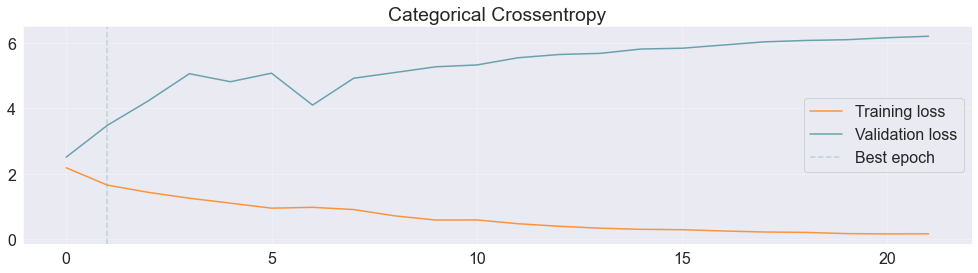

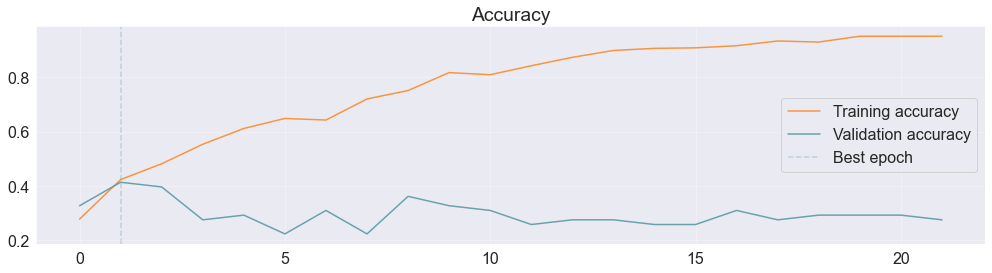

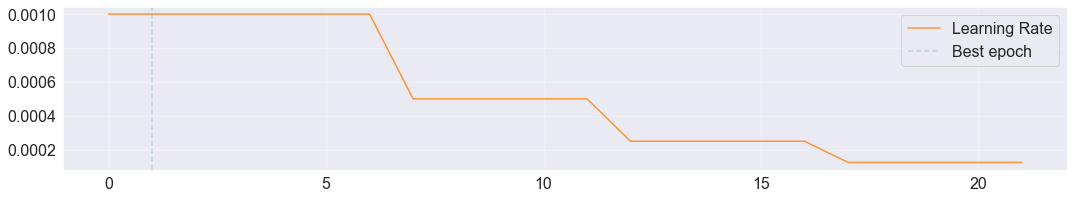

In [836]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [349]:
model.save('best_model')

INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


In [350]:
predictions = model.predict(x_test)
predictions.shape

2022-12-14 01:40:48.311418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-14 01:40:48.442589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-14 01:40:48.711633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 3s 74ms/step


(851, 12)

Accuracy: 0.6545
Precision: 0.6175
Recall: 0.4856
F1: 0.4957


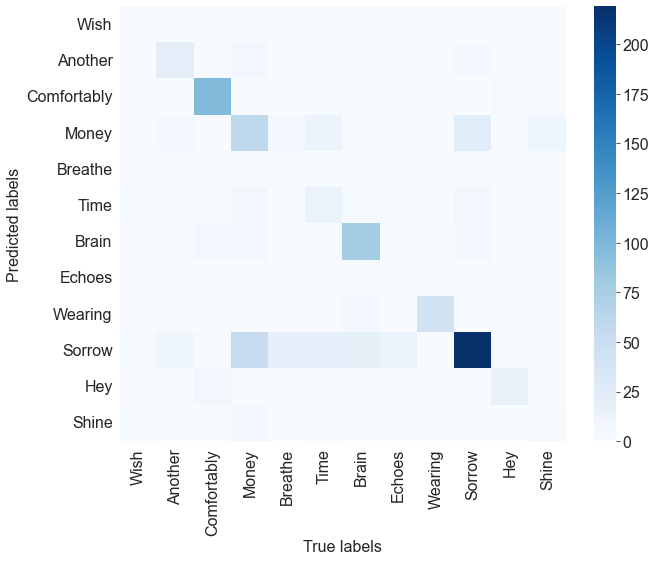

In [351]:
# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test_categorical, axis=-1), np.argmax(predictions, axis=-1))

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(y_test_categorical, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(y_test_categorical, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(y_test_categorical, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(y_test_categorical, axis=-1), np.argmax(predictions, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues', xticklabels=list(label_mapping.keys()), yticklabels=list(label_mapping.keys()))
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()